In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sales = pd.read_csv('walmart.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

change 'Date' datatype to datetime

In [3]:
sales['date'] = pd.to_datetime(sales['Date'])

In [4]:
sales['date'].dtype

dtype('<M8[ns]')

In [5]:
type(sales['date'])

pandas.core.series.Series

In [6]:
sales['date'] = pd.to_datetime(sales['date'])

In [7]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [8]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [9]:
  sales['Hour'] = (sales['Time']).dt.hour    #type(sales['Time'])

Let's see the unique hours of sales in this dataset

In [10]:
sales['Hour'].nunique()  #gives us the number of unique hours 

11

In [11]:
  sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [12]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


 ### Number of unique values in columns with object datatype

In [13]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [14]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [15]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


### Get Gender Count

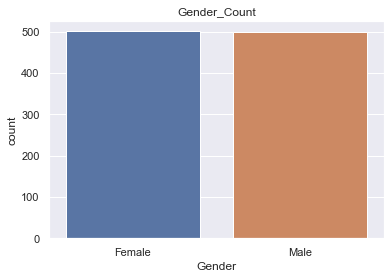

In [17]:
sns.set(style="darkgrid")      
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

### Rating for all 3 branches of Walmart Store

Text(0.5, 1.0, 'Ratings by Branch')

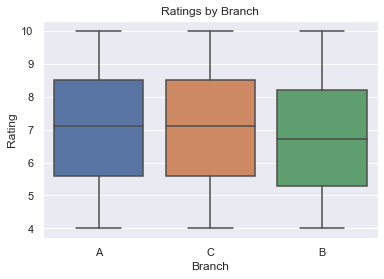

In [18]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

Branch B has the lowest rating among all the branches

*Sales by the hour in the comapny* Most of the item were sold around 14:00 hrs local time

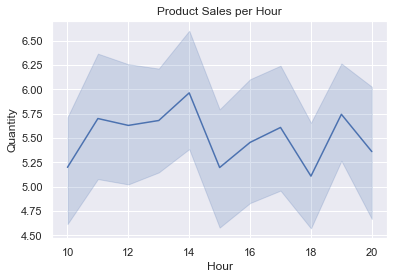

In [19]:
salesCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion 

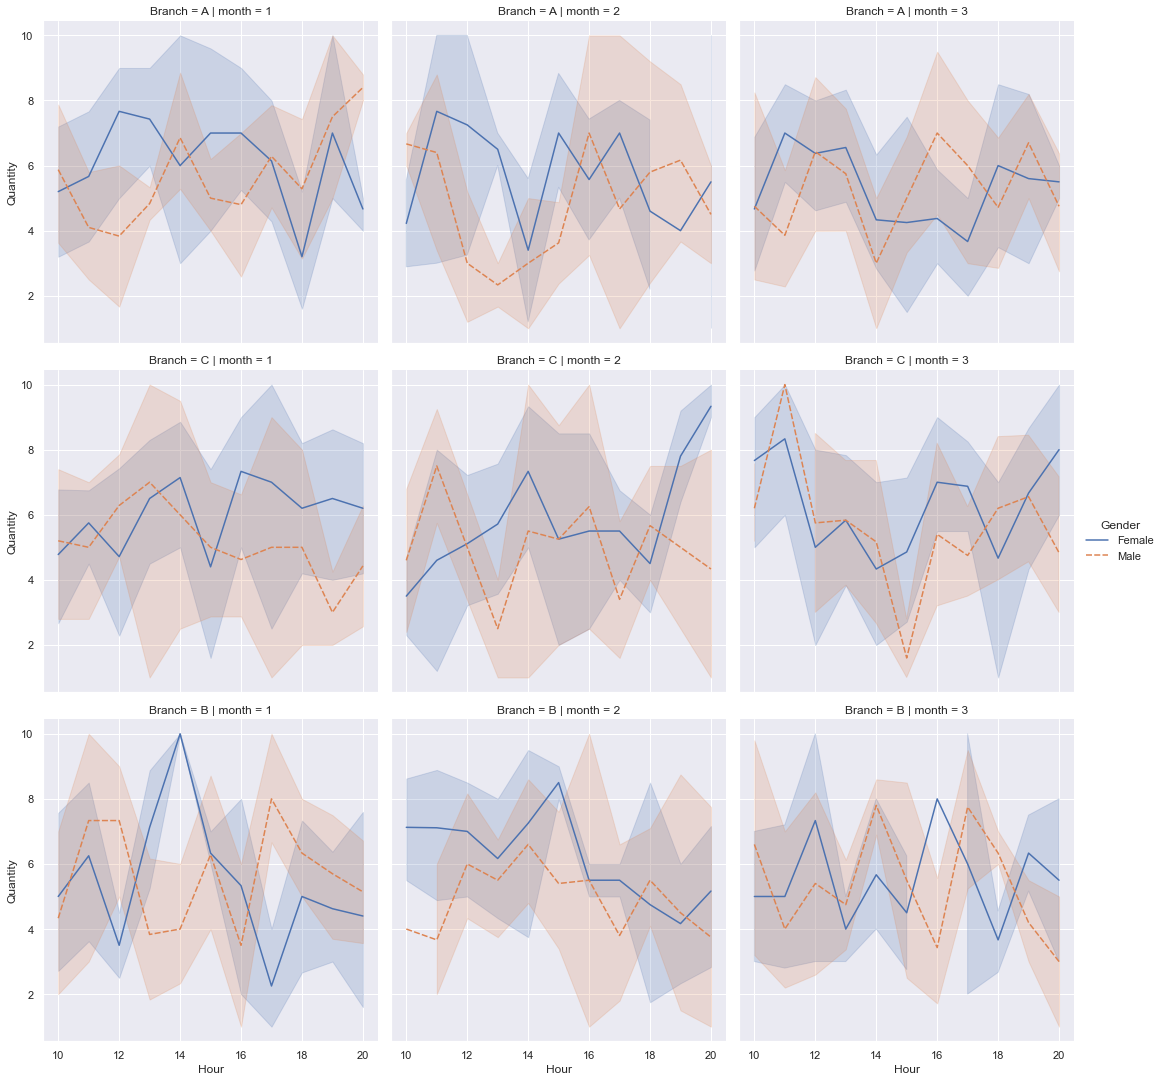

In [21]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

 Below we can see each branch's sales by the hour in a monthly fashion 

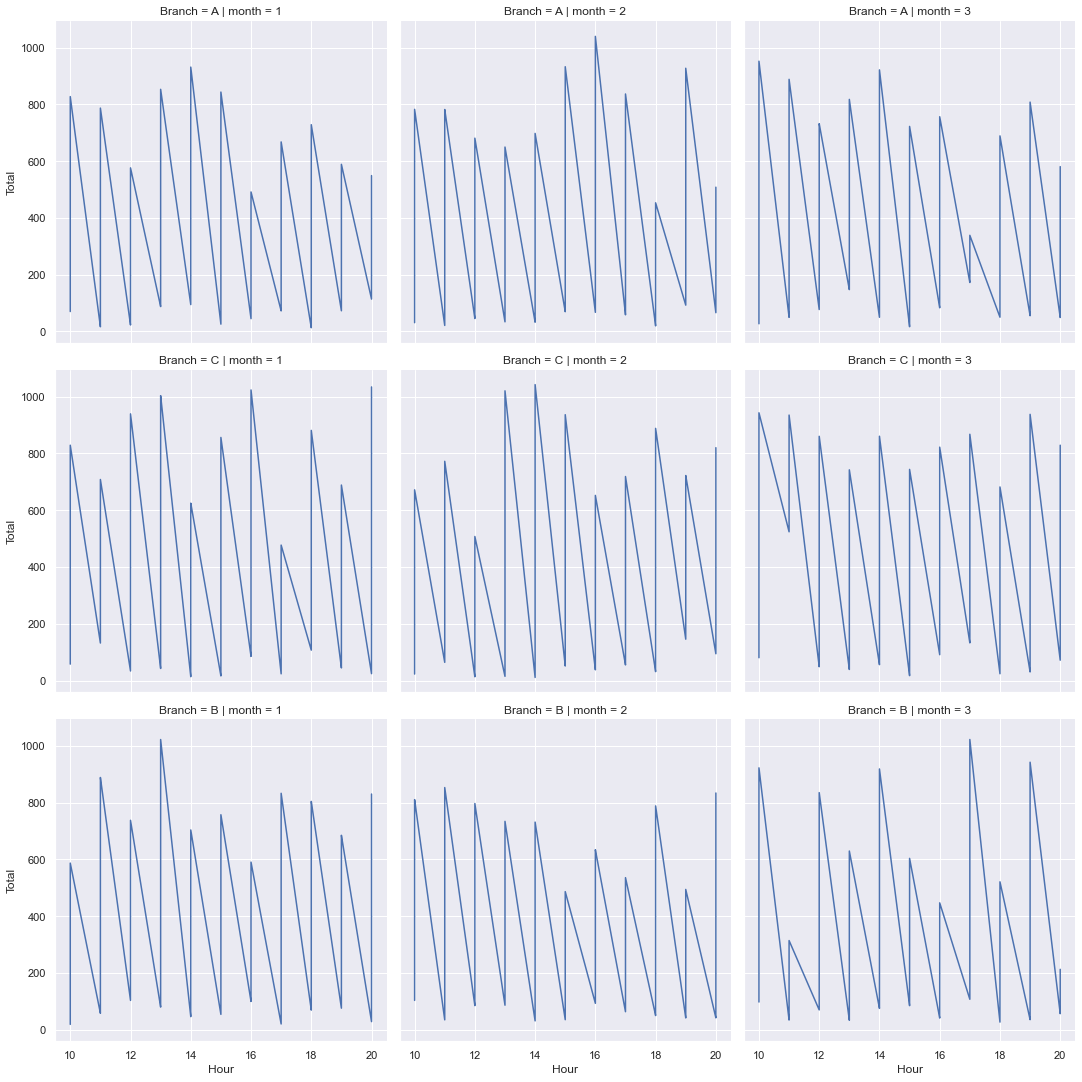

In [22]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [23]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

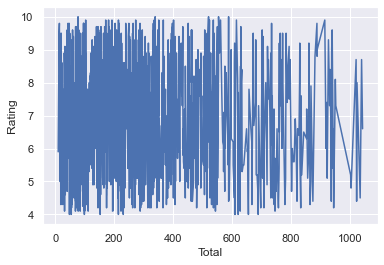

In [24]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

## Product Analysis

Let's look at the various products' performance.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

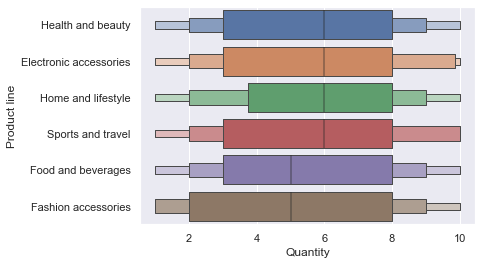

In [25]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories. 

<AxesSubplot:xlabel='count', ylabel='Product line'>

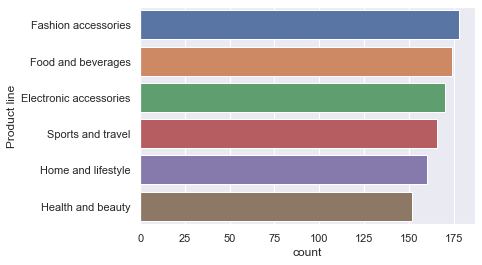

In [26]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<AxesSubplot:xlabel='Total', ylabel='Product line'>

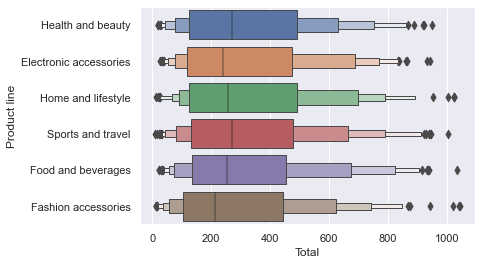

In [27]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

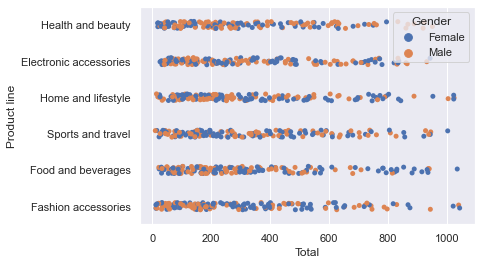

In [28]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

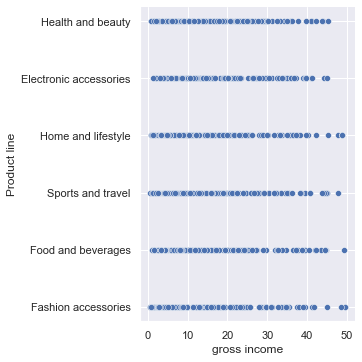

In [29]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

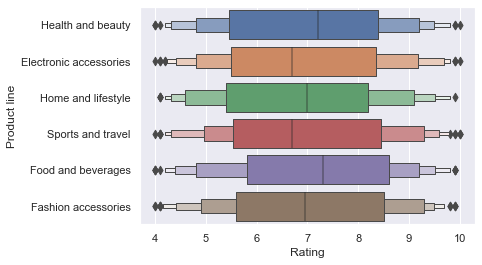

In [30]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Food and Beverages have the highest average rating while sports and travel the lowest

Let's see when customers buy certain products in the various branches. 

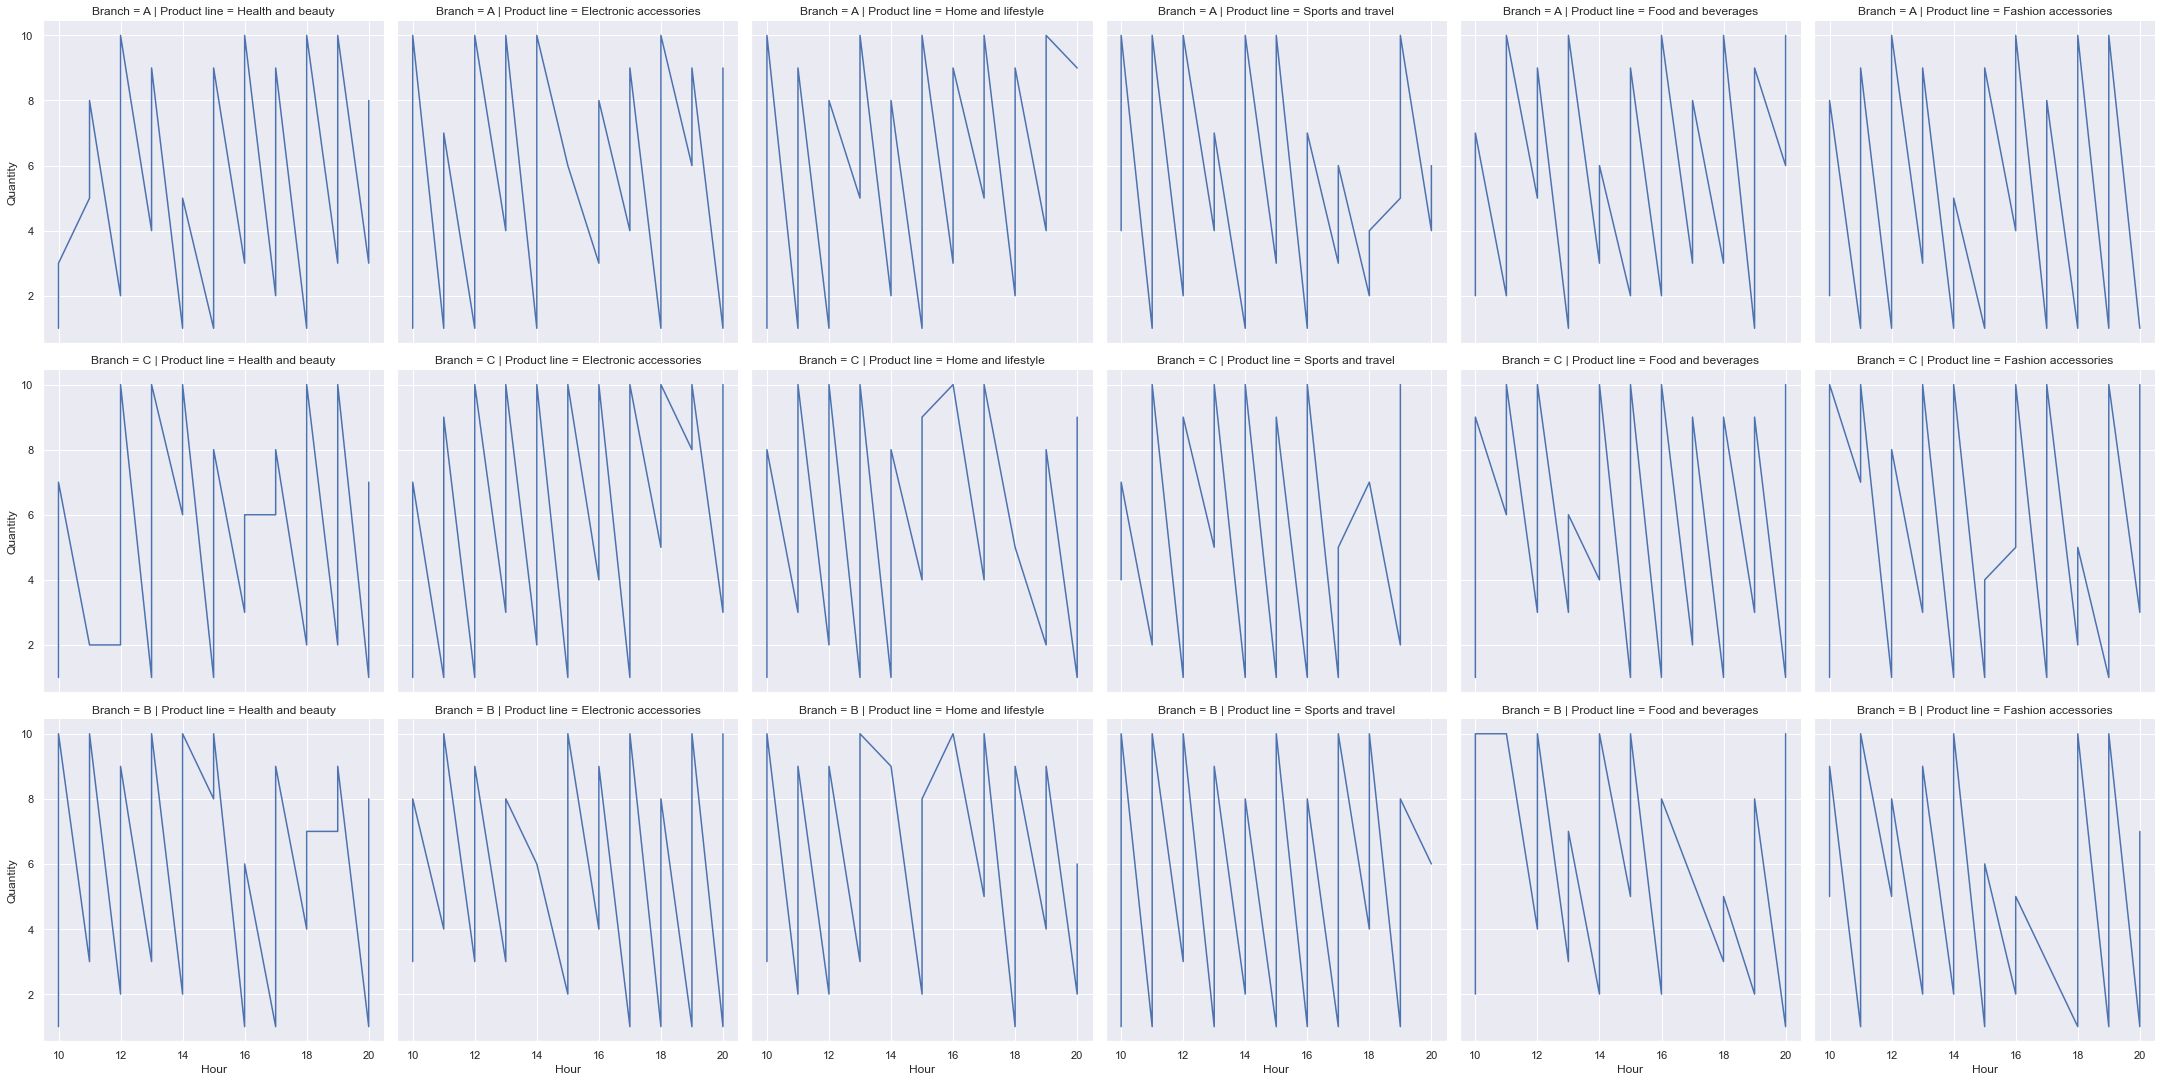

In [31]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00 

# Payment Channel

Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

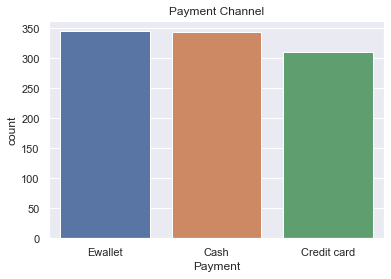

In [32]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

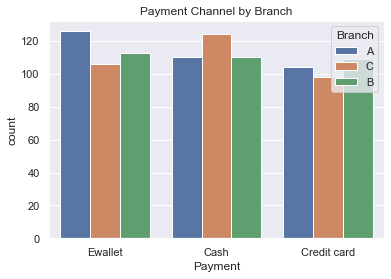

In [33]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are 

In [34]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

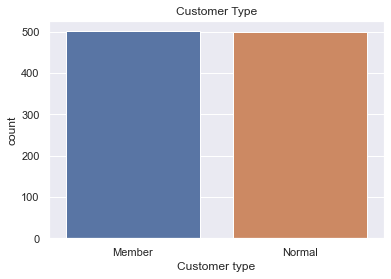

In [35]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

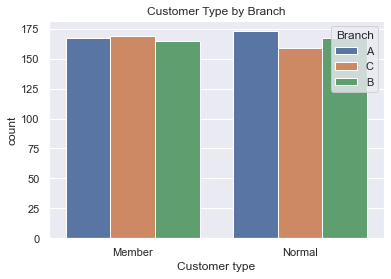

In [36]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

## Does customer type influences the sales 

In [37]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

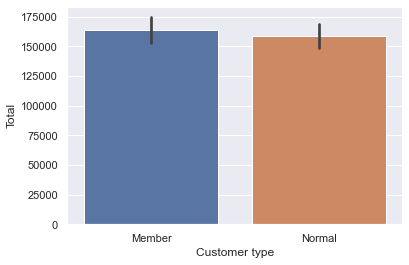

In [38]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Do the customer type influence customer rating? Let's find out 

Text(0.5, 1.0, 'Customer Type')

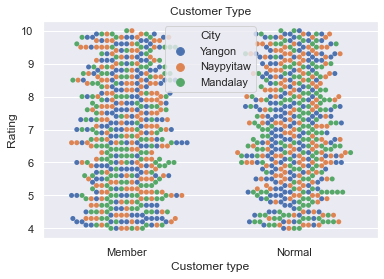

In [39]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

With the use of google search, I was able to get the longitude and latitude of each cities. We can 

In [40]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

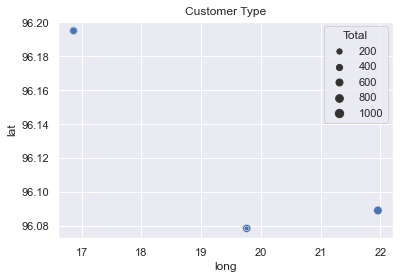

In [41]:
 sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

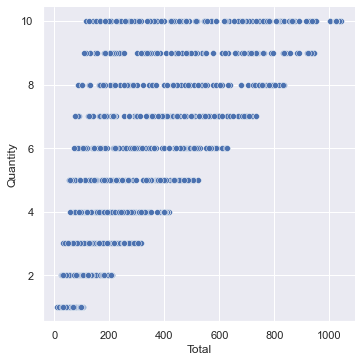

In [42]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)

In [45]:
#branch = sales.loc[sales['Branch'] == 'A'] 
branch = sales.loc[sales['Product line'] == 'Electronic accessories'] 
branch.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,date,day,month,year,Hour,long,lat
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,19.7633,96.0785
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,4.761905,29.8865,4.1,2019-03-25,25,3,2019,18,19.7633,96.0785
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,4.761905,20.6520,5.8,2019-02-25,25,2,2019,14,16.8661,96.1951
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,...,4.761905,5.1020,6.8,2019-03-09,9,3,2019,17,21.9588,96.0891
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,...,4.761905,11.7375,7.1,2019-02-12,12,2,2019,10,16.8661,96.1951


In [48]:
EA1 = branch.loc[branch['Branch'] == 'A'] 
EA1= EA1[["Branch","Product line","Quantity","date"]]
EA1.head()

,Branch,Product line,Quantity,date
6,A,Electronic accessories,6,2019-02-25
12,A,Electronic accessories,5,2019-02-12
23,A,Electronic accessories,5,2019-02-17
37,A,Electronic accessories,9,2019-01-15
95,A,Electronic accessories,1,2019-03-08


In [49]:
EA1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 992
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Branch        60 non-null     object        
 1   Product line  60 non-null     object        
 2   Quantity      60 non-null     int64         
 3   date          60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ KB


In [50]:
EA2 = branch.loc[branch['Branch'] == 'B'] 
EA2= EA2[["Branch","Product line","Quantity","date"]]
EA2.head()

,Branch,Product line,Quantity,date
11,B,Electronic accessories,4,2019-03-09
45,B,Electronic accessories,4,2019-03-09
48,B,Electronic accessories,6,2019-02-10
133,B,Electronic accessories,6,2019-02-17
156,B,Electronic accessories,1,2019-01-04


In [51]:
EA3 = branch.loc[branch['Branch'] == 'C'] 
EA3= EA3[["Branch","Product line","Quantity","date"]]
EA3.head()

,Branch,Product line,Quantity,date
1,C,Electronic accessories,5,2019-03-08
5,C,Electronic accessories,7,2019-03-25
20,C,Electronic accessories,5,2019-02-25
55,C,Electronic accessories,8,2019-02-28
59,C,Electronic accessories,6,2019-03-12


In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.compose import (TransformedTargetForecaster,
                                        make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter,
                                      
                                                ForecastingGridSearchCV)
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series


sns.set()
plt.style.use('bmh')

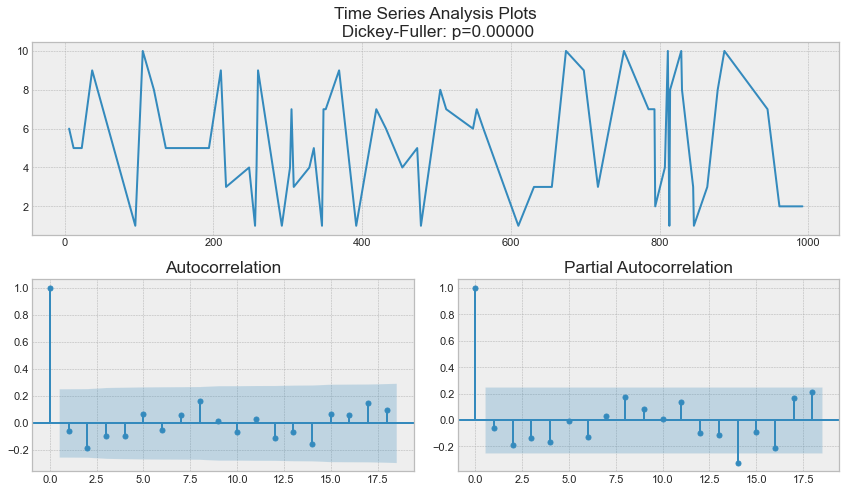

In [53]:
import warnings
warnings.filterwarnings("ignore")

# adapted from https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    
tsplot(EA1.Quantity)

In [54]:
data=EA1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -117.349
Date:                Tue, 17 Aug 2021   AIC                            238.698
Time:                        21:16:12   BIC                            242.440
Sample:                             0   HQIC                           240.112
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.3958      0.403     13.398      0.000       4.606       6.185
sigma2         7.7808      2.283      3.408      0.001       3.307      12.255
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.27   Prob(JB):                         0.34
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.98   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


def plot_forecast(series_train, series_test, forecast, forecast_int=None):

    mae = mean_absolute_error(series_test, forecast)
    mape = mean_absolute_percentage_error(series_test, forecast)

    plt.figure(figsize=(12, 6))
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}", size=18)
    series_train.plot(label="train", color="b")
    series_test.plot(label="test", color="g")
    forecast.index = series_test.index
    forecast.plot(label="forecast", color="r")
    if forecast_int is not None:
        plt.fill_between(
            series_test.index,
            forecast_int["lower"],
            forecast_int["upper"],
            alpha=0.2,
            color="dimgray",
        )
    plt.legend(prop={"size": 16})
    plt.show()

    return mae, mape

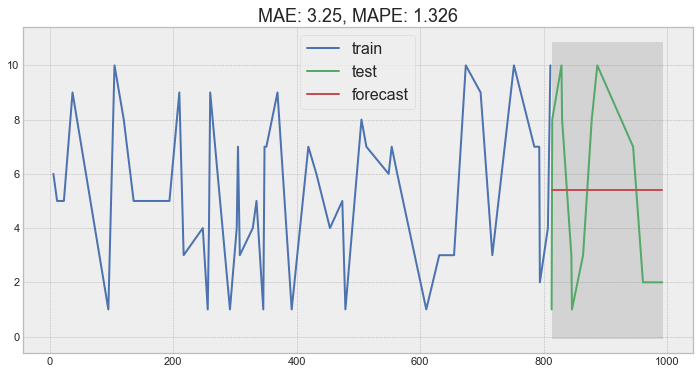

In [56]:
import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)


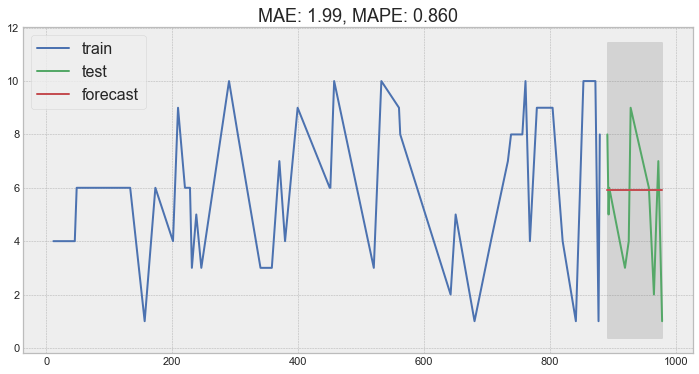

In [57]:
data=EA2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
#forecaster.summary()
#import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)


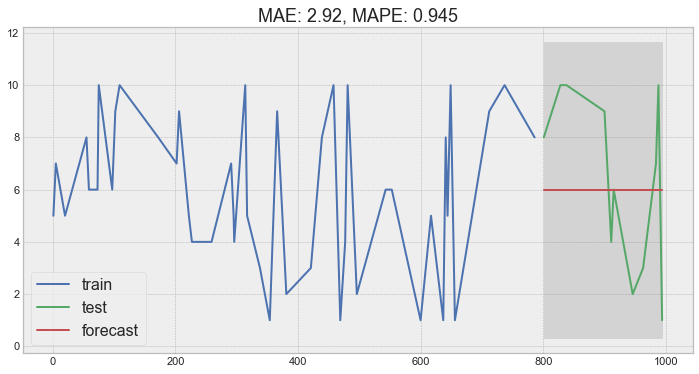

In [58]:
data=EA3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
#forecaster.summary()
#import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)


In [59]:
branch = sales.loc[sales['Product line'] == 'Health and beauty']
HB1 = branch.loc[branch['Branch'] == 'A'] 
HB1= HB1[["Branch","Product line","Quantity","date"]]

HB2 = branch.loc[branch['Branch'] == 'B'] 
HB2= HB2[["Branch","Product line","Quantity","date"]]

HB3 = branch.loc[branch['Branch'] == 'C'] 
HB3= HB3[["Branch","Product line","Quantity","date"]]


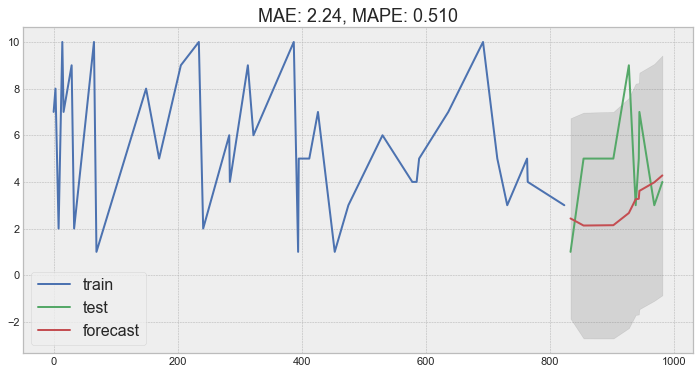

In [60]:
data=HB1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
#forecaster.summary()
#import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

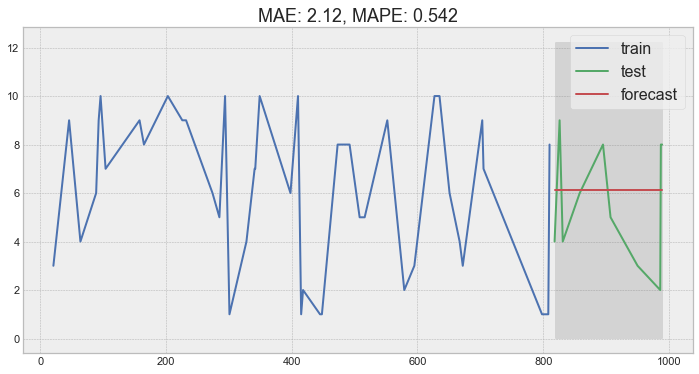

In [61]:
data=HB2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
#forecaster.summary()
#import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)


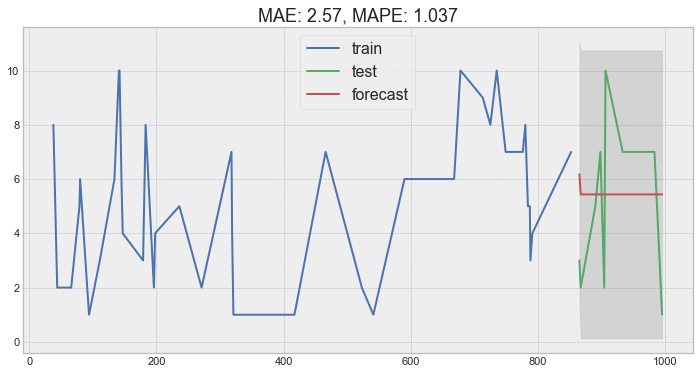

In [62]:
data=HB3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
#forecaster.summary()
#import numpy as np
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)


In [63]:
branch = sales.loc[sales['Product line'] == 'Home and lifestyle']
HL1 = branch.loc[branch['Branch'] == 'A'] 
HL1= HL1[["Branch","Product line","Quantity","date"]]

HL2 = branch.loc[branch['Branch'] == 'B'] 
HL2= HL2[["Branch","Product line","Quantity","date"]]

HL3 = branch.loc[branch['Branch'] == 'C'] 
HL3= HL3[["Branch","Product line","Quantity","date"]]


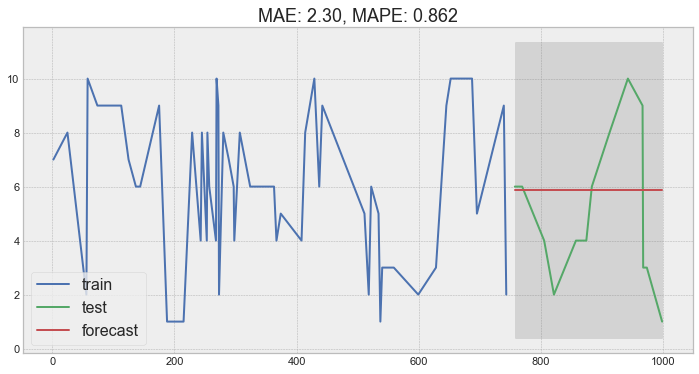

In [64]:
data=HL1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

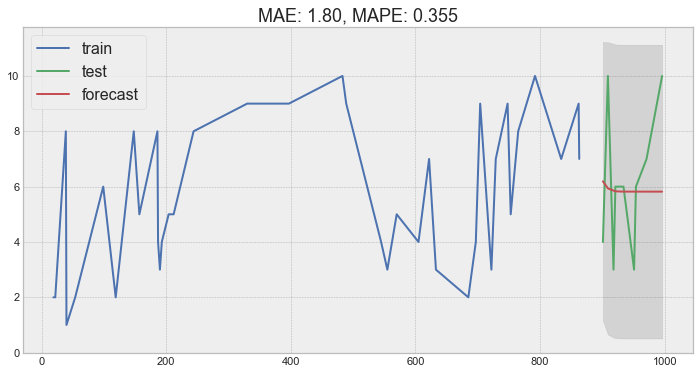

In [65]:
data=HL2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

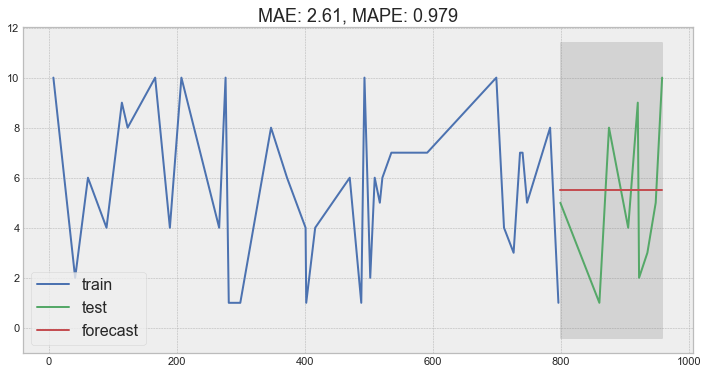

In [66]:
data=HL3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

In [67]:
branch = sales.loc[sales['Product line'] == 'Sports and travel']
ST1 = branch.loc[branch['Branch'] == 'A'] 
ST1= ST1[["Branch","Product line","Quantity","date"]]

ST2 = branch.loc[branch['Branch'] == 'B'] 
ST2= ST2[["Branch","Product line","Quantity","date"]]

ST3 = branch.loc[branch['Branch'] == 'C'] 
ST3= ST3[["Branch","Product line","Quantity","date"]]


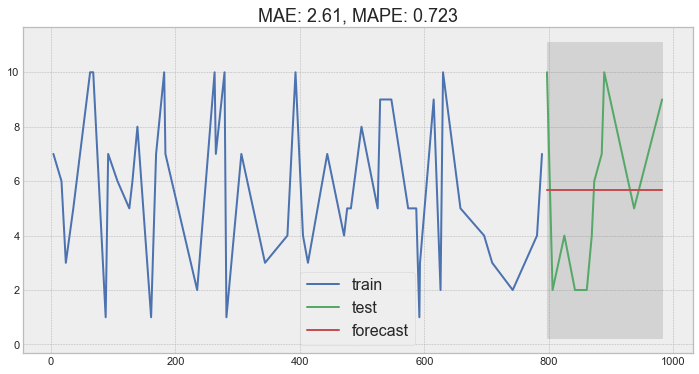

In [68]:
data=ST1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

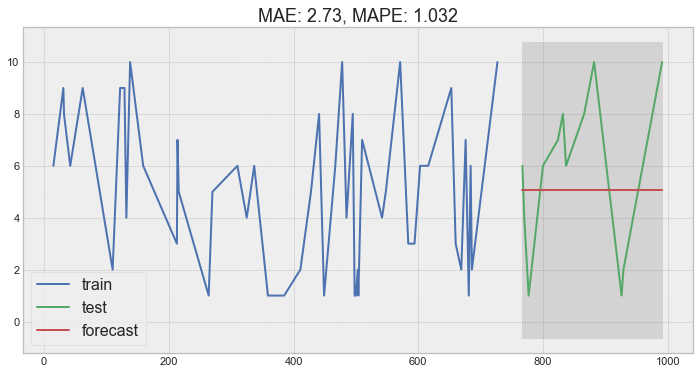

In [69]:
data=ST2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

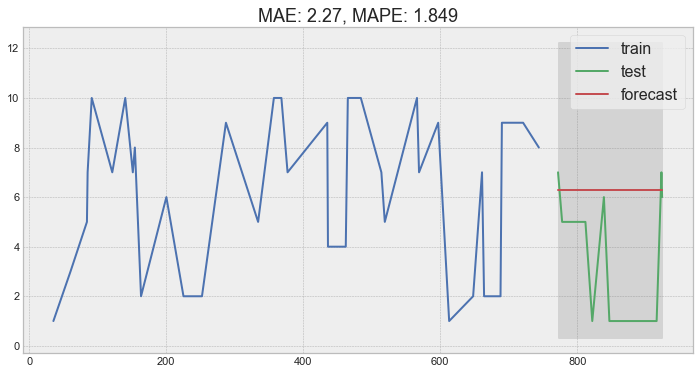

In [70]:
data=ST3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

In [74]:
branch = sales.loc[sales['Product line'] == 'Food and beverages']
FB1 = branch.loc[branch['Branch'] == 'A'] 
FB1= FB1[["Branch","Product line","Quantity","date"]]

FB2 = branch.loc[branch['Branch'] == 'B'] 
FB2= FB2[["Branch","Product line","Quantity","date"]]

FB3 = branch.loc[branch['Branch'] == 'C'] 
FB3= FB3[["Branch","Product line","Quantity","date"]]


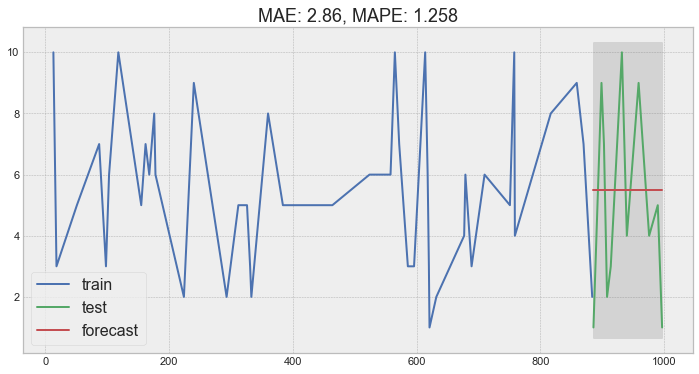

In [75]:
data=FB1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

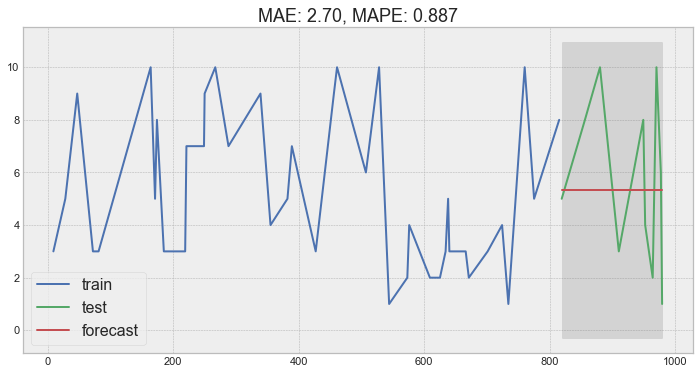

In [76]:
data=FB2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

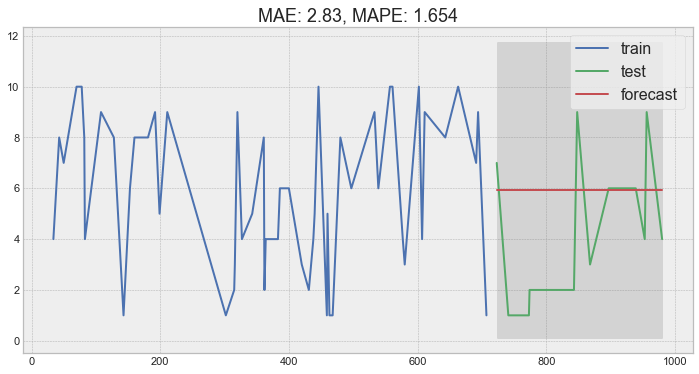

In [77]:
data=FB3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

In [78]:
branch = sales.loc[sales['Product line'] == 'Fashion accessories']
FA1 = branch.loc[branch['Branch'] == 'A'] 
FA1= FA1[["Branch","Product line","Quantity","date"]]

FA2 = branch.loc[branch['Branch'] == 'B'] 
FA2= FA2[["Branch","Product line","Quantity","date"]]

FA3 = branch.loc[branch['Branch'] == 'C'] 
FA3= FA3[["Branch","Product line","Quantity","date"]]

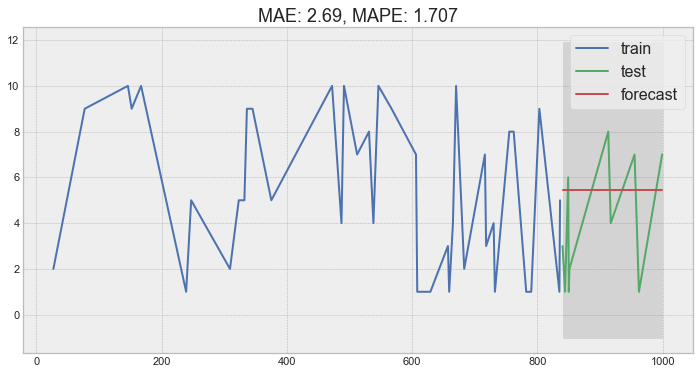

In [79]:
data=FA1.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

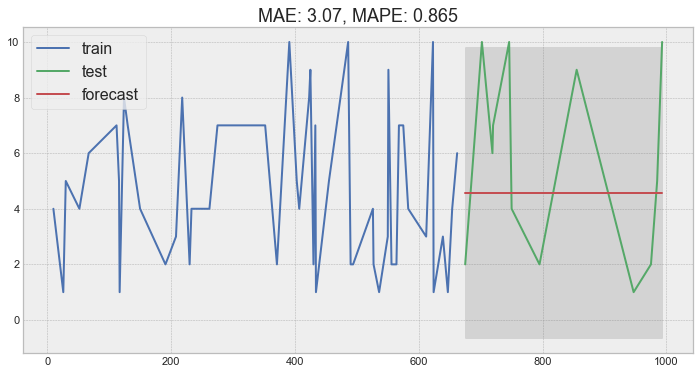

In [80]:
data=FA2.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

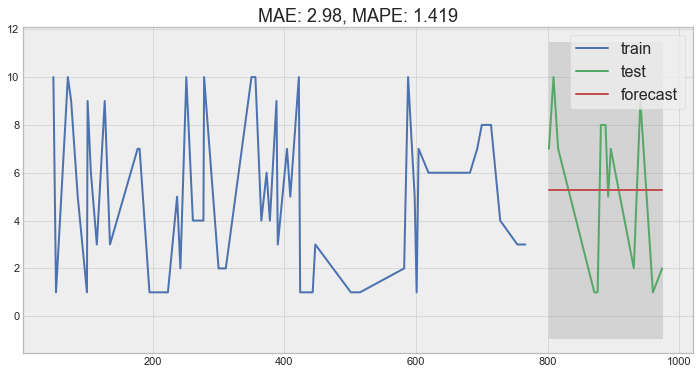

In [81]:
data=FA3.Quantity
test_len = int(len(data) * 0.2)
train, test = data.iloc[:-test_len], data.iloc[-test_len:]
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
data.index = data.index.astype(int)
forecaster.fit(train)
fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
arima_mae, arima_mape = plot_forecast(
    train, test, forecast, forecast_int
)

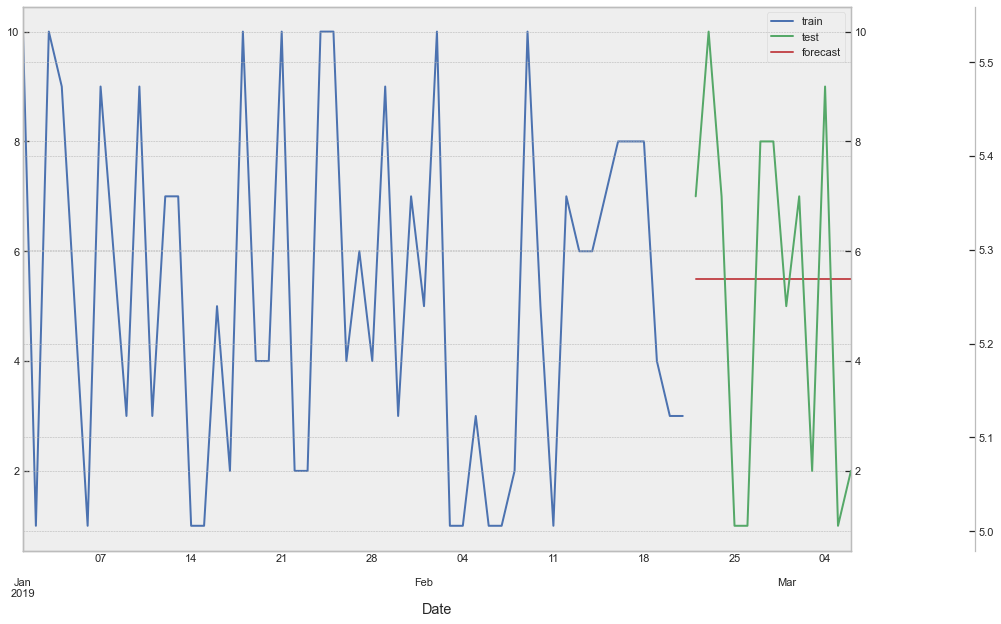

In [92]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['train'].plot(ax=ax1, style='b-')
df['test'].plot(ax=ax1, style='g-', secondary_y=True)
df['forecast'].plot(ax=ax2, style='r-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['train','test','forecast'])